In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [42]:
df_train = pd.read_csv("./data_train_pso.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,label,2,5,7,8,9,11,12,13,14,...,181,186,187,193,197,203,204,205,209,212
0,0.0,10.0,274.986868,-0.319753,-1.432466,325.821586,84.0,9.0,9.0,437.750000,...,2383.209877,650.000000,-0.338865,9.000000,950.222222,991.309467,1.000000,172.000000,10656.395062,135.800000
1,0.0,17.0,104.913059,0.158313,-0.696295,336.569414,32.0,10.0,16.0,312.222222,...,2193.439446,384.000000,0.095966,3.000000,574.500000,912.932251,0.882353,-15.000000,3944.000000,-1.066667
2,3.0,16.0,4.687572,0.396421,-0.312612,94.909877,-2.0,16.0,15.0,329.600000,...,49.109375,14.000000,0.217133,15.000000,593.733333,338.632833,1.000000,-4.000000,2058.773333,95.500000
3,3.0,23.0,3.591772,-0.021014,-0.856142,254.059787,9.0,10.0,0.0,0.036070,...,0.045933,14.000000,-0.026782,6.000000,420.181818,325.369999,0.739130,-9.000000,1120.888889,12.000000
4,1.0,9.0,25.118469,-0.276816,-1.271399,461.130814,-1.0,9.0,8.0,427.250000,...,736.000000,72.000000,-0.285584,8.000000,1068.750000,877.512514,1.000000,2.000000,671.000000,136.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,3.0,16.0,51.114860,2.153820,2.645687,365.256750,-2.0,15.0,15.0,342.666667,...,22201.000000,0.003006,0.003006,0.003006,0.003757,0.003757,0.003757,0.022262,0.044242,0.037385
8512,1.0,9.0,5.894913,-0.311206,-1.184514,358.414529,-5.0,9.0,8.0,481.250000,...,2913.580247,24.000000,-0.625647,8.000000,1091.750000,267.711052,0.888889,-3.000000,1294.530612,155.333333
8513,2.0,15.0,107.653355,0.475616,0.784000,180.045117,20.0,14.0,14.0,341.714286,...,2954.775510,136.000000,0.385381,12.000000,654.571429,484.863590,1.000000,-4.000000,2213.551020,104.000000
8514,1.0,9.0,24.535688,-0.263431,-1.567800,251.455499,-1.0,9.0,8.0,449.750000,...,24.000000,64.000000,-0.320207,7.000000,1075.000000,704.569046,1.000000,14.000000,4933.551020,88.222222


In [43]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [44]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [45]:
df_test = pd.read_csv("./data_test_pso.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,4,6,7,8,10,11,12,13,...,180,185,186,192,196,202,203,204,208,211
0,0.0,14.0,153.204817,0.996355,0.207174,459.037295,-28.0,13.0,13.0,358.307692,...,92.686391,554.0,0.999941,10.0,710.615385,794.307350,0.928571,-10.000000,729.000000,127.600000
1,0.0,10.0,266.399867,0.979352,0.388359,398.464564,-60.0,10.0,6.0,532.800000,...,7281.937500,932.0,0.965488,4.0,968.222222,900.143486,0.600000,64.000000,15314.750000,112.285714
2,0.0,11.0,251.329664,0.260470,-1.002325,340.802438,-52.0,8.0,7.0,403.000000,...,2661.728395,784.0,0.270281,6.0,796.400000,1236.308241,1.000000,26.000000,1944.489796,131.111111
3,2.0,13.0,8.986100,0.048579,-1.449012,412.324324,-5.0,12.0,12.0,322.333333,...,787.638889,26.0,-0.014314,12.0,757.333333,803.828940,1.000000,-4.000000,6122.750000,121.833333
4,0.0,23.0,82.344017,3.023659,10.404884,168.041577,7.0,9.0,20.0,223.750000,...,1288.640000,398.0,1.761865,16.0,396.173913,316.582423,0.083333,0.022262,0.044242,45.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,9.0,36.509417,1.263183,0.543003,364.303573,-18.0,9.0,8.0,438.571429,...,4051.918367,118.0,1.263183,8.0,1071.250000,856.643246,0.777778,0.000000,2843.265306,96.000000
2126,1.0,8.0,33.839959,-0.454057,-1.036905,181.876516,0.0,8.0,7.0,463.142857,...,10.750000,104.0,-0.457057,5.0,1196.000000,746.905354,1.000000,-26.000000,228.555556,169.142857
2127,3.0,16.0,23.734082,0.371174,-0.657132,137.696567,-10.0,16.0,15.0,335.733333,...,739.982222,82.0,0.348673,14.0,595.600000,333.718093,1.000000,-8.000000,1270.061224,90.400000
2128,1.0,8.0,180.470587,0.587475,-1.363827,561.988537,12.0,8.0,7.0,462.000000,...,431.750000,448.0,0.587475,5.0,1080.571429,588.205240,1.000000,18.000000,51.840000,101.000000


In [46]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [47]:
x_test = scale.transform(x_test)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train, random_state=119)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4258, 98)
Vallidation: (4258, 98)


In [49]:
rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features= 'sqrt', n_estimators= 1000)
# ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 50)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')
svc_clf = SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.1,max_depth= 5,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')

In [50]:
# Huấn luyện các mô hình con
rf_clf.fit(x_train,y_train)
# ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [51]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    rf_clf.predict_proba(x_val),
    # ab_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    rf_clf.predict_proba(x_test),
    # ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [52]:
print(f"X_train_meta:{X_train_meta.shape}")
print(f"X_test_meta:{X_test_meta.shape}")

X_train_meta:(4258, 20)
X_test_meta:(2130, 20)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
model = AdaBoostClassifier()
params = {
    'n_estimators': [10,50,100,1000],
    'learning_rate': [0.01,0.1,1,10],
    'algorithm': ['SAMME', 'SAMME.R'],
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

In [54]:
result_test = grid_model.predict(X_test_meta)

In [55]:
grid_model.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 100}

In [56]:
grid_model.best_score_

0.9549084027302174

In [57]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

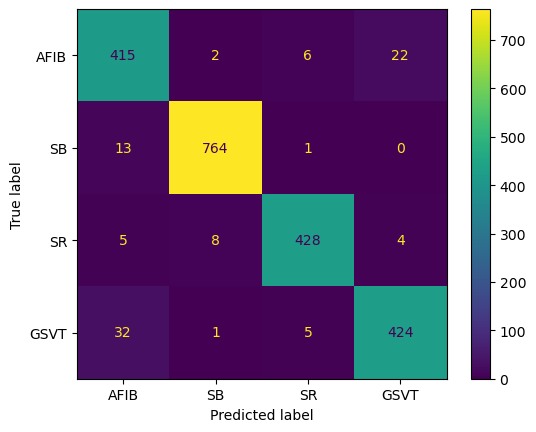

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.962441,0.932584,0.892473,0.912088,0.970326
1,SB,0.988263,0.982005,0.985806,0.983902,0.991864
2,SR,0.986385,0.961798,0.972727,0.967232,0.992878
3,GSVT,0.969953,0.917749,0.942222,0.929825,0.984412
4,macro avg,NaN,0.948262,0.948307,0.948534,NaN
5,micro avg,NaN,0.953521,0.953521,0.953521,NaN
6,weighted avg,NaN,0.953686,0.954121,0.953521,NaN


In [58]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [59]:
df_evaluation_test.to_csv("./Result/Blending_Ada_pso.csv")